# Data Modelling

To enhance the readability of the code and numerical analysis, `numpy` library is imported as `np` as well as `pandas` library has been imported as `pd` to retrieve the dataset. Apart from this, `PrettyPrinter` library is imported from `pprint` package to notifies the recursion and add the ID of the dictionary explicitly. To make an ensemble on various sub-samples of the dataset and evaluate the model adequately, the `RandomForestClassifier` library has been imported from the `sklearn.ensemble` package. To build an additive model in a forward stage-wise fashion `GradientBoostingClassifier`library is imported from `sklearn.ensemble`package. `VotingClassifier` library has been imported from `sklearn.ensemble` package to train various base models or estimators and predicts on the basis of aggregating the findings of each base estimator. To train the model, the `train_test_split` library has been imported from the `sklearn.model_selection` package as well as `classification_report` library has been imported from `sklearn.metrics` package to measure and evaluate the classification performance of the model.

In [316]:
import numpy as np
import pandas as pd
from pprint import PrettyPrinter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/model_evaluation.html

In [317]:
np.random.seed(0) # `np.random.seed(0)` makes the random numbers predictable. With the seed reset (every time), the same set 
# of numbers will appear every time.
pp = PrettyPrinter(indent=4) # `PrettyPrinter()` function is used with `indent=4` parameter to maximize readability and 
# consistency in Python code bases.

## Data Preparation, Exploratory Analysis and Feature Engineering

Dataframe containing features and target variable have been read using the `read_csv()` function.

In [318]:
data = pd.read_csv('data/data.csv') # To read the dataset from the data folder `read_csv` function is used with pandas.

In [319]:
data = data.fillna(0) # Replaced empty cells with zeros using `data.fillna()` function.

In [320]:
data.isnull().values.any() # To check the null values, the `isnull()` and `values.any()` functions are applied. As a result, 
# `False` is highlighted as the evidence of not having any missing values in the output.

False

## Calculated and plotted correlation between all features and removed highly correlated features using Pandas

In [321]:
corr_matrix = data.corr().abs() # The `corr()` method finds the correlation of each column in a DataFrame `data`. The 
# `data.abs()` function return a Series/DataFrame with absolute numeric value of each element.
corr_matrix

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,...,priceToBookRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,enterpriseValueMultiple,priceFairValue,shareGrowth
revenuePerShare,1.000000,0.998925,0.998609,0.998630,0.909948,0.995980,0.998810,0.995980,0.889493,0.003414,...,0.002492,0.002448,0.002221,0.002590,0.002590,0.002411,0.002711,0.002552,0.002492,0.016659
netIncomePerShare,0.998925,1.000000,0.995472,0.995496,0.891063,0.999009,0.999933,0.999009,0.868931,0.002952,...,0.002155,0.002116,0.001920,0.002239,0.002239,0.002084,0.002344,0.002207,0.002155,0.015379
operatingCashFlowPerShare,0.998609,0.995472,1.000000,0.999952,0.929898,0.990280,0.995351,0.990280,0.911686,0.003527,...,0.002575,0.002530,0.002295,0.002677,0.002677,0.002491,0.002801,0.002638,0.002575,0.018655
freeCashFlowPerShare,0.998630,0.995496,0.999952,1.000000,0.929594,0.990339,0.995375,0.990339,0.911080,0.003590,...,0.002621,0.002574,0.002336,0.002724,0.002724,0.002536,0.002851,0.002684,0.002621,0.018869
cashPerShare,0.909948,0.891063,0.929898,0.929594,1.000000,0.870181,0.890951,0.870181,0.997831,0.004733,...,0.003456,0.003394,0.003080,0.003591,0.003591,0.003343,0.003759,0.003539,0.003456,0.025918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
priceEarningsToGrowthRatio,0.002411,0.002084,0.002491,0.002536,0.003343,0.002013,0.002216,0.002013,0.003565,0.664808,...,0.999427,0.999885,0.997193,0.997138,0.997138,1.000000,0.991474,0.998229,0.999427,0.014814
priceSalesRatio,0.002711,0.002344,0.002801,0.002851,0.003759,0.002263,0.002491,0.002263,0.004008,0.756475,...,0.995317,0.993338,0.978935,0.998488,0.998488,0.991474,1.000000,0.997470,0.995317,0.011880
enterpriseValueMultiple,0.002552,0.002207,0.002638,0.002684,0.003539,0.002131,0.002346,0.002131,0.003774,0.708074,...,0.999670,0.999017,0.990972,0.999869,0.999869,0.998229,0.997470,1.000000,0.999670,0.013506
priceFairValue,0.002492,0.002155,0.002575,0.002621,0.003456,0.002081,0.002290,0.002081,0.003685,0.689715,...,1.000000,0.999826,0.994087,0.999126,0.999126,0.999427,0.995317,0.999670,1.000000,0.014070


In [322]:
# Selected upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,...,priceToBookRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,enterpriseValueMultiple,priceFairValue,shareGrowth
revenuePerShare,NaN,0.998925,0.998609,0.998630,0.909948,0.995980,0.998810,0.995980,0.889493,0.003414,...,0.002492,0.002448,0.002221,0.002590,0.002590,0.002411,0.002711,0.002552,0.002492,0.016659
netIncomePerShare,NaN,NaN,0.995472,0.995496,0.891063,0.999009,0.999933,0.999009,0.868931,0.002952,...,0.002155,0.002116,0.001920,0.002239,0.002239,0.002084,0.002344,0.002207,0.002155,0.015379
operatingCashFlowPerShare,NaN,NaN,NaN,0.999952,0.929898,0.990280,0.995351,0.990280,0.911686,0.003527,...,0.002575,0.002530,0.002295,0.002677,0.002677,0.002491,0.002801,0.002638,0.002575,0.018655
freeCashFlowPerShare,NaN,NaN,NaN,NaN,0.929594,0.990339,0.995375,0.990339,0.911080,0.003590,...,0.002621,0.002574,0.002336,0.002724,0.002724,0.002536,0.002851,0.002684,0.002621,0.018869
cashPerShare,NaN,NaN,NaN,NaN,NaN,0.870181,0.890951,0.870181,0.997831,0.004733,...,0.003456,0.003394,0.003080,0.003591,0.003591,0.003343,0.003759,0.003539,0.003456,0.025918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
priceEarningsToGrowthRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.991474,0.998229,0.999427,0.014814
priceSalesRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997470,0.995317,0.011880
enterpriseValueMultiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999670,0.013506
priceFairValue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014070


In [323]:
# Found features with correlation greater than 0.95 which will be dropped from the dataset as the required threshold value only 0.2 
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [324]:
to_drop

['netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'enterpriseValue',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'grahamNumber',
 'grahamNetNet',
 'capexPerShare',
 'costAndExpenses',
 'operatingIncome',
 'operatingIncomeRatio',
 'totalOtherIncomeExpensesNet',
 'incomeBeforeTax',
 'incomeBeforeTaxRatio',
 'netIncome',
 'netIncomeRatio',
 'eps',
 'epsdiluted',
 'weightedAverageShsOutDil',
 'operatingIncomeGrowth',
 'epsgrowth',
 'epsdilutedGrowth',
 'weightedAverageSharesDilutedGrowth',
 'tenYOperatingCFGrowthPerShare',
 'fiveYOperatingCFGrowthPerShare',
 'threeYOperatingCFGrowthPerShare',
 'tenYNetIncomeGrowthPerShare',
 'fiveYNetIncomeGrowthPerShare',
 'threeYNetIncomeGrowthPerShare',
 'five

In [325]:
# Dropped features using `drop()` function by taking two parameters `axis=1` and `inplace=True`.
corr_matrix.drop(to_drop, axis=1, inplace=True)

In [326]:
corr_matrix

,revenuePerShare,cashPerShare,marketCap,peRatio,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,...,returnOnAssets,ebtPerEbit,longTermDebtToCapitalization,totalDebtToCapitalization,cashFlowToDebtRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,shortTermCoverageRatios,dividendPaidAndCapexCoverageRatio,shareGrowth
revenuePerShare,1.000000,0.909948,0.003414,0.002448,0.002300,0.022926,0.007112,0.024894,0.002338,0.003062,...,0.025061,0.006363,0.035390,0.032133,0.002426,0.005456,0.002589,0.005248,0.001066,0.016659
netIncomePerShare,0.998925,0.891063,0.002952,0.002116,0.001836,0.025788,0.006987,0.026023,0.002315,0.003081,...,0.024347,0.005545,0.037808,0.032337,0.002157,0.004190,0.002251,0.004715,0.001015,0.015379
operatingCashFlowPerShare,0.998609,0.929898,0.003527,0.002530,0.002341,0.022834,0.007581,0.024597,0.002485,0.003242,...,0.027754,0.006621,0.034993,0.034280,0.002376,0.002706,0.002865,0.004962,0.000737,0.018655
freeCashFlowPerShare,0.998630,0.929594,0.003590,0.002574,0.002215,0.022709,0.008095,0.024956,0.002392,0.003322,...,0.029681,0.006783,0.035361,0.034385,0.002387,0.001926,0.003125,0.004790,0.000336,0.018869
cashPerShare,0.909948,1.000000,0.004733,0.003394,0.000844,0.009201,0.007591,0.021772,0.003001,0.003215,...,0.034966,0.008777,0.023218,0.037426,0.003289,0.000203,0.003778,0.006409,0.004495,0.025918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
priceEarningsToGrowthRatio,0.002411,0.003343,0.664808,0.999885,0.000790,0.043844,0.008660,0.055024,0.000163,0.015348,...,0.023727,0.004909,0.040352,0.030009,0.001986,0.006499,0.007181,0.004256,0.001092,0.014814
priceSalesRatio,0.002711,0.003759,0.756475,0.993338,0.000984,0.045211,0.008236,0.054277,0.000267,0.015204,...,0.021440,0.005520,0.041380,0.022973,0.002201,0.006051,0.006703,0.004765,0.004728,0.011880
enterpriseValueMultiple,0.002552,0.003539,0.708074,0.999017,0.000880,0.044543,0.008543,0.054804,0.000211,0.015315,...,0.022755,0.005197,0.040920,0.026835,0.002088,0.006323,0.006980,0.004497,0.002753,0.013506
priceFairValue,0.002492,0.003456,0.689715,0.999826,0.000831,0.044261,0.008565,0.054918,0.000190,0.015337,...,0.023180,0.005074,0.040692,0.028220,0.002044,0.006402,0.007070,0.004394,0.002037,0.014070


`sort_values()` function has been used with correlation matrix for targeted variable `shareGrowth` and set the outcome in a descending order. This helps to identify the most important features from the index of correlation matrix as those are the most correlated with the target variable.

In [327]:
df = corr_matrix.sort_values(['shareGrowth'], ascending=False).head(10) 

In [328]:
df 

,revenuePerShare,cashPerShare,marketCap,peRatio,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,...,returnOnAssets,ebtPerEbit,longTermDebtToCapitalization,totalDebtToCapitalization,cashFlowToDebtRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,shortTermCoverageRatios,dividendPaidAndCapexCoverageRatio,shareGrowth
shareGrowth,0.016659,0.025918,0.006505,0.014484,0.028551,0.147146,0.012355,0.350992,0.039213,0.026358,...,0.097138,0.003134,0.060472,0.074428,0.007748,0.255440,0.012434,0.048344,0.043123,1.000000
currentRatio,0.024894,0.021772,0.034812,0.054984,0.086974,0.368482,0.019038,1.000000,0.073022,0.026742,...,0.037806,0.021912,0.157141,0.137686,0.008026,0.211375,0.075467,0.004264,0.053414,0.350992
stockBasedCompensationToRevenue,0.016769,0.019808,0.005799,0.002803,0.000841,0.179464,0.006123,0.415309,0.001575,0.017163,...,0.471182,0.034688,0.106997,0.075596,0.010100,0.575427,0.178070,0.022386,0.010462,0.308759
researchAndDdevelopementToRevenue,0.010997,0.013285,0.000857,0.009769,0.007147,0.151668,0.005591,0.303772,0.000084,0.007949,...,0.310688,0.020612,0.095390,0.072094,0.002296,0.610911,0.032285,0.014688,0.009457,0.295573
operatingProfitMargin,0.023690,0.030561,0.005218,0.007196,0.034103,0.106736,0.010622,0.259044,0.012403,0.007937,...,0.450832,0.032368,0.076097,0.003109,0.007529,0.861822,0.026367,0.006364,0.008275,0.290968
cashRatio,0.009411,0.027610,0.011576,0.033622,0.015276,0.271152,0.017611,0.801391,0.042757,0.012260,...,0.013668,0.029026,0.112962,0.128945,0.007199,0.083929,0.036728,0.022410,0.038383,0.276678
operatingCashFlowSalesRatio,0.005456,0.000203,0.002326,0.006455,0.001496,0.042655,0.003532,0.211375,0.015418,0.002577,...,0.264282,0.049764,0.028292,0.006847,0.009314,1.000000,0.016962,0.016472,0.022602,0.255440
netProfitMargin,0.014815,0.018024,0.004789,0.008118,0.027557,0.010751,0.040005,0.153976,0.013398,0.001573,...,0.405535,0.024771,0.021368,0.020027,0.003884,0.502208,0.028296,0.012242,0.004391,0.217883
ebitPerRevenue,0.017441,0.021980,0.005157,0.008449,0.027790,0.000888,0.043099,0.136005,0.015239,0.001282,...,0.337873,0.025970,0.013811,0.031448,0.005239,0.418937,0.025939,0.009296,0.000489,0.201785
pretaxProfitMargin,0.017441,0.021980,0.005157,0.008449,0.027790,0.000888,0.043099,0.136005,0.015239,0.001282,...,0.337873,0.025970,0.013811,0.031448,0.005239,0.418937,0.025939,0.009296,0.000489,0.201785


In [329]:
col_names = list(df.index) # Here, `index` returns the index information of the DataFrame using the `list()`.

In [330]:
col_names

['shareGrowth',
 'currentRatio',
 'stockBasedCompensationToRevenue',
 'researchAndDdevelopementToRevenue',
 'operatingProfitMargin',
 'cashRatio',
 'operatingCashFlowSalesRatio',
 'netProfitMargin',
 'ebitPerRevenue',
 'pretaxProfitMargin']

In [331]:
df_final = data[col_names] # `df_final` object has been generated as a new dataframe within the most relevant features names
# which is enlightened in the output pane.

In [332]:
df_final

,shareGrowth,currentRatio,stockBasedCompensationToRevenue,researchAndDdevelopementToRevenue,operatingProfitMargin,cashRatio,operatingCashFlowSalesRatio,netProfitMargin,ebitPerRevenue,pretaxProfitMargin
0,0.348744,1.533173,0.013945,0.078249,0.180515,0.664423,0.197753,0.207438,0.177997,0.177997
1,-0.082432,1.271979,0.003856,0.000000,0.069748,0.093500,0.089289,0.050149,0.065686,0.065686
2,1.062603,1.363604,0.024877,0.068310,0.241473,0.360710,0.293878,0.209136,0.244398,0.244398
3,0.196094,3.177350,0.012926,0.162538,0.390278,2.561694,0.400529,0.236939,0.253292,0.253292
4,0.180224,0.976446,0.000392,0.000000,-0.027043,0.135815,0.024212,-0.017902,-0.027878,-0.027878
...,...,...,...,...,...,...,...,...,...,...
538,0.265210,0.851140,0.010702,0.099666,0.161427,0.021368,0.152731,0.121293,0.133333,0.133333
539,0.415486,1.447358,0.191973,0.254218,-0.199658,0.410693,0.109333,-0.207802,-0.206149,-0.206149
540,5.201161,3.281676,0.117414,0.107730,0.020390,0.848138,0.243941,0.040640,0.042338,0.042338
541,1.992131,3.731515,0.281483,0.226956,-0.264234,0.334632,0.183915,-0.266924,-0.261387,-0.261387


To create this heatmap chart, library `seaborn` has been imported as `sns`. The `plt.figure()` function has been used to get the accurate figure. In this given chart, pearson correlation coefficient relationship has been made with target variable and other features where all variables are relate with diagonally. Here, the deep red colour box are highlighted strong relationship with each variable and dark blue colour box are represented weak relation with each other.

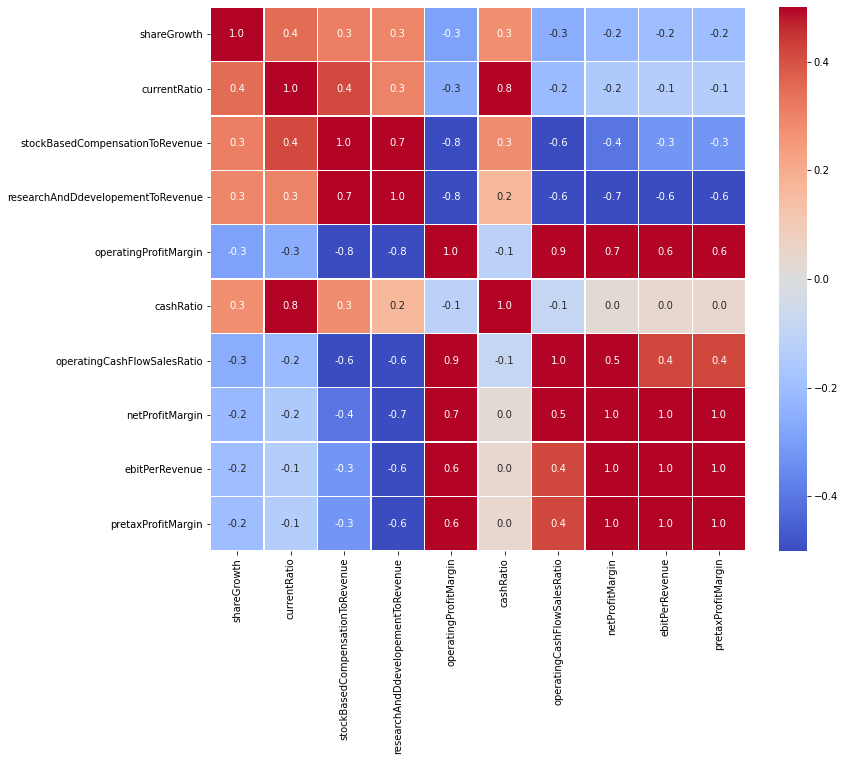

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
chart = sns.heatmap(df_final.corr(), vmin=-0.5, vmax=0.5,annot=True, fmt='.1f', linewidths=.5, cmap="coolwarm")
# heatmap chart

Converted share price growth feature into a binary target variable for classification. As our threshold value is `0.2`, targeted variable's name has been changed as `shareGrowthAboveTwenty` instead of `shareGrowth`. Test values in feature `shareGrowth` and return 1 if threshold value `0.2` is greater than `x` else return `0` in new Series in variable `shareGrowthAboveTwenty`.

In [334]:
threshold = 0.2
df_final['shareGrowthAboveTwenty'] = df_final['shareGrowth'].apply(lambda x: 1 if x>threshold else 0)

<ipython-input-334-1db6882c3e94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['shareGrowthAboveTwenty'] = df_final['shareGrowth'].apply(lambda x: 1 if x>threshold else 0)


Displayed number of rows and columns (including target variable) for validation

In [335]:
df_final.shape

(543, 11)

In [336]:
df_final

,shareGrowth,currentRatio,stockBasedCompensationToRevenue,researchAndDdevelopementToRevenue,operatingProfitMargin,cashRatio,operatingCashFlowSalesRatio,netProfitMargin,ebitPerRevenue,pretaxProfitMargin,shareGrowthAboveTwenty
0,0.348744,1.533173,0.013945,0.078249,0.180515,0.664423,0.197753,0.207438,0.177997,0.177997,1
1,-0.082432,1.271979,0.003856,0.000000,0.069748,0.093500,0.089289,0.050149,0.065686,0.065686,0
2,1.062603,1.363604,0.024877,0.068310,0.241473,0.360710,0.293878,0.209136,0.244398,0.244398,1
3,0.196094,3.177350,0.012926,0.162538,0.390278,2.561694,0.400529,0.236939,0.253292,0.253292,0
4,0.180224,0.976446,0.000392,0.000000,-0.027043,0.135815,0.024212,-0.017902,-0.027878,-0.027878,0
...,...,...,...,...,...,...,...,...,...,...,...
538,0.265210,0.851140,0.010702,0.099666,0.161427,0.021368,0.152731,0.121293,0.133333,0.133333,1
539,0.415486,1.447358,0.191973,0.254218,-0.199658,0.410693,0.109333,-0.207802,-0.206149,-0.206149,1
540,5.201161,3.281676,0.117414,0.107730,0.020390,0.848138,0.243941,0.040640,0.042338,0.042338,1
541,1.992131,3.731515,0.281483,0.226956,-0.264234,0.334632,0.183915,-0.266924,-0.261387,-0.261387,1


Target variable is created and removed collinear features to target variable (features which use target variable to calculate its own value). 

In [337]:
target = df_final['shareGrowthAboveTwenty']
features = df_final.drop([
    'shareGrowth', 'shareGrowthAboveTwenty',
    'stockBasedCompensationToRevenue',
    'operatingCashFlowSalesRatio',
], axis=1)
features.shape

(543, 7)

Splitted data into training and testing sets

In [338]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=0
)

# Random Forest

Initialised random forest classifier and traind the model

## Hyperparameter Tuning using GridSearchCV

To fit a number of decision tree classifiers on various sub-samples of the dataset and to improve the predictive accuracy and control over-fitting `RandomForestClassifier` is imported from `sklearn.ensemble` package and to search over specified parameter values for an estimator `GridSearchCV` is imported from `sklearn.model_selection` package.

In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

In [340]:
grid_param = {
    "n_estimators": [100,200,300, 400,500], # Used different parameters to perform the hyperparameter tuning with `GridSearchCV ` techniques.
    "criterion": ["gini","entropy"],
    "max_depth": range(2,10,1),
    "max_features": ['auto','log2']
}

In [341]:
rand_clf = RandomForestClassifier(random_state=0) # `rand_clf` object has been made by applying `RandomForestClassifier()` function.

Here, `grid_search` is created from `GridSearchCV()` function using various parameters such as `estimator`, `param_grid`,`cv`, and `verbose` where `verbose` controls the verbosity, `estimator` provides a score, `param_grid` combined some parameters to provide the best params and `cv(cross-validation)` determines the cross-validation splitting strategy.



In [342]:
grid_search = GridSearchCV(estimator=rand_clf, param_grid = grid_param, cv= 5,verbose=3)

In [343]:
grid_search.fit(X_train, y_train) # Fitted the data with grid_search using '.fit()' method to do the GridSearchCV optimisation.


Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=100; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=200; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=200; total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=200; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=200; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, max_features=

[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=200; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=200; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=300; total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=300; total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=300; total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=300; total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=300; total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=400; total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=400; total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=400; total time=   0.7s
[CV 4/5] END criteri

[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=400; total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=400; total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=400; total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500; total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500; total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500; total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500; total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500; total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=100; total time=   0.1s
[CV 3/5] END criteri

[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=100; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=200; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=300; total time=   0.4s
[CV 2/5] END criteri

[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=300; total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=400; total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=400; total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=400; total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=400; total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=400; total time=   0.6s
[CV 1/5] END criteri

[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=400; total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=500; total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=500; total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=500; total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=500; total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=500; total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=100; total tim

[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=200; total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=300; total tim

[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200; total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=300; total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=400; total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=400; total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=400; total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=400; total tim

[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=400; total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=400; total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=400; total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=400; total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500; total time=   1.3s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500; total time=   1.2s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500; total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500; total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=500; total time=   0.9s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=100; total tim

[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500; total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500; total time=   0.9s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=100; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=100; total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=100; total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=100; total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=100; total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=200; total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=200; total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=200; total tim

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [344]:
grid_search.best_params_ #Taken best_params using grid_search.

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 100}

Displayed best parameters for RandomForestClassifier algorithm.

In [345]:
random_clf = RandomForestClassifier(criterion = 'gini',
                                    max_features = 'auto',
                                    max_depth=2,
                                    n_estimators=100,random_state=0
                                 )

In [346]:
random_clf.fit(X_train, y_train) # # Fitted the model with training data using `.fit()` function.

RandomForestClassifier(max_depth=2, random_state=0)

Calculated the training score of model using training data and `.score()` function

In [347]:
random_clf.score(X_train, y_train) 

0.7578947368421053

Calculated the testing score of model using test data and `.score()` function.

In [348]:
random_clf.score(X_test, y_test) 

0.7055214723926381

## Classification Metrics

### Precision, Recall and F1-score

Here, the `Precision` is mentioned as the predict value and the `Recall` is for actual values. As it is difficult to compare two models with low precision and high recall values, therefore, f1-score helps 'to measure the recall and precision using the Harmonic Mean in place of Arithmatic Mean' which has been highlighted in the output pane using the `print()` function. Here, low recall is likely mean that the hedge fund is missing out on good investments. 

In [349]:
print(classification_report(y_test, random_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.73      0.83      0.78       102
           1       0.64      0.49      0.56        61

    accuracy                           0.71       163
   macro avg       0.69      0.66      0.67       163
weighted avg       0.70      0.71      0.70       163



### Learning Curve for RandomForestClassifier

Here, the libraries numpy and matplotlib imported to explore and read the plot explicitely. To evaluate the model adequately, `RandomForestClassifier` is imported from `sklearn.ensemble` package. To display the learning curve transparently `learning_curve` library is imported from `sklearn.model_selection` package. Apart from this, to display the learning Curve for RandomForestClassifier appropriately, `random_clf` has taken as estimator, `X = features`, `y = target`, `cv=10`. Here, `n_jobs=-1` refers the number of process to run in parallel and `np.linspace()`function returns evenly spaced numbers over a specified interval. The `numpy. mean()` function is used to compute the arithmetic mean along the specified axis and `np.std()` computes the standard deviation of the given data along the specified axis. The `plot.subplots()` creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. The `plt.plot()`function is used to make a 2D hexagonal binning plot of points x, y. The `plt.fill_between()` function is used to fill area between two horizontal curves. Here, the `plt.xlabel()`, `plt.ylabel()`, `plt.title()` functions have been used to get the xlabel as `Training Set Size`, ylabel as `Accuracy Score` and the title of the barplot as `Learning Curve`. The `plt.tight_layout()` adjusts subplot params so that the subplot(s) fits in to the figure area. The `plt.grid()`,
`plt.show()` are used to show grid background and display the plot appropriately.

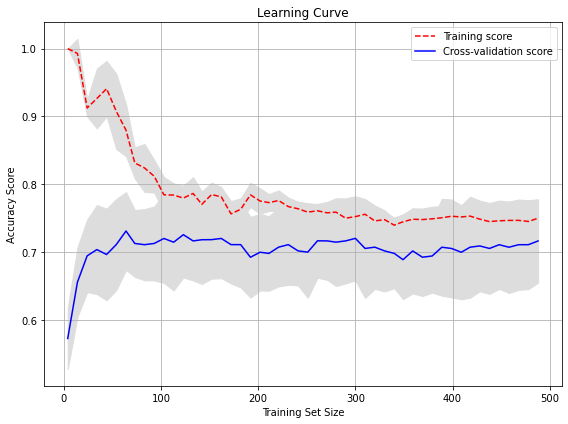

In [350]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
estimator = random_clf
X = features
y = target 


train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(8,6))
plt.plot(train_sizes, train_mean, '--', color='red',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [374]:
labels = features.columns.values
weights = random_clf.feature_importances_
top_features = sorted(list(zip(labels,weights)), reverse=True, key = lambda x: abs(x[1]))[0:5] # # Top five features have taken using `sorted()` function.
top_labels = [x[0] for x in top_features] # for loop to plot the top n features
top_weights = [x[1] for x in top_features]  
pp.pprint(top_labels)
pp.pprint(top_weights) # `pprint()` explicitly notifies the recursion and also adds the ID of the dictionary.

[   'researchAndDdevelopementToRevenue',
    'cashRatio',
    'currentRatio',
    'operatingProfitMargin',
    'pretaxProfitMargin']
[   0.2956835031048366,
    0.29306527646598907,
    0.20780896832345835,
    0.0784902824956015,
    0.04579133188782326]


The above five independent features are more relevant with target variable in terms of correlation and causalty to provide the business outcome and benefits.

Here, 15 predicted classes have represents comparing with actual classes.

In [352]:
y_predict = random_clf.predict(X_test)
for index, (actual, predicted) in enumerate(zip(y_test[0:15], y_predict[0:15])):
    print(str(index) + '.', 'Actual:', actual, 'Predicted:', round(predicted, 1))

0. Actual: 0 Predicted: 0
1. Actual: 0 Predicted: 0
2. Actual: 0 Predicted: 0
3. Actual: 1 Predicted: 1
4. Actual: 0 Predicted: 0
5. Actual: 0 Predicted: 0
6. Actual: 1 Predicted: 0
7. Actual: 1 Predicted: 0
8. Actual: 0 Predicted: 0
9. Actual: 0 Predicted: 0
10. Actual: 1 Predicted: 0
11. Actual: 1 Predicted: 0
12. Actual: 0 Predicted: 0
13. Actual: 1 Predicted: 0
14. Actual: 1 Predicted: 1


# Gradient Boosting Classifier

Initialised gradient boosting classifier and trained model

## Hyperparameter Tuning using RandomizedSearchCV

To build an additive model in a forward stage-wise fashion `GradientBoostingClassifier` is imported from `sklearn.ensemble` package and to randomly search on hyper parameters using cross-validation technique `RandomizedSearchCV` is imported from `sklearn.model_selection` package. 

In [353]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [355]:
rand_params = {"learning_rate" : [0.0, 0.1, 1.0], # Here, randomly selected some parameters to create `rand_params` object. 
                    "max_depth" : (1,3,5),
                    "criterion" : ['friedman_mse', 'squared_error'],
                    "loss" : ['log_loss', 'deviance', 'exponential'],
                    "max_features": ['auto', 'sqrt', 'log2']
                }

In [356]:
GradBoost_clf = GradientBoostingClassifier(random_state=0) # `GradBoost_clf` model has made using `GradientBoostingClassifier()` function.

In [357]:
randomized_search = RandomizedSearchCV(GradBoost_clf,rand_params, cv= 5,verbose=3) # `RandomizedSearchCV()`function is used to 
# randomly optimised the parameters.

In [358]:
randomized_search.fit(X_train, y_train) # Fitted the data using the '.fit()' function and added with the `randomized_search` 
# object to tune the hyperparameter appropriately.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=1.0, loss=deviance, max_depth=3, max_features=auto; total time=   0.1s
[CV 2/5] END criterion=friedman_mse, learning_rate=1.0, loss=deviance, max_depth=3, max_features=auto; total time=   0.2s
[CV 3/5] END criterion=friedman_mse, learning_rate=1.0, loss=deviance, max_depth=3, max_features=auto; total time=   0.1s
[CV 4/5] END criterion=friedman_mse, learning_rate=1.0, loss=deviance, max_depth=3, max_features=auto; total time=   0.1s
[CV 5/5] END criterion=friedman_mse, learning_rate=1.0, loss=deviance, max_depth=3, max_features=auto; total time=   0.1s
[CV 1/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, max_features=log2; total time=   0.0s
[CV 2/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=3, max_features=log2; total time=   0.0s
[CV 3/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, ma

C:\Users\Akter\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Akter\anaconda3\lib\site

[CV 1/5] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2; total time=   0.2s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2; total time=   0.2s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2; total time=   0.1s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2; total time=   0.1s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.1, loss=deviance, max_depth=5, max_features=log2; total time=   0.1s
[CV 1/5] END criterion=friedman_mse, learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2; total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2; total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2; total time=   0.0s
[CV 4/5] END cr

C:\Users\Akter\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Akter\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Akter\anaconda3\lib\site

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.0, 0.1, 1.0],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': (1, 3, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   verbose=3)

In [359]:
randomized_search.best_params_  # Obtained the best parameters using the `best_params_` option.

{'max_features': 'log2',
 'max_depth': 1,
 'loss': 'exponential',
 'learning_rate': 1.0,
 'criterion': 'friedman_mse'}

In [360]:
# Using best parameters by applying `GradientBoostingClassifier()` function for `GradBoost_clf` object.

GradBoost_clf = GradientBoostingClassifier(criterion='friedman_mse',
                                 max_depth=1,
                                 max_features='log2',
                                 loss = 'exponential',          
                                 learning_rate= 1.0,random_state=0
                                 )

In [361]:
GradBoost_clf.fit(X_train, y_train) # Fitted the model with training data using `.fit()` function.

GradientBoostingClassifier(learning_rate=1.0, loss='exponential', max_depth=1,
                           max_features='log2', random_state=0)

Calculated the training score of model using training data and `.score()` function

In [362]:
GradBoost_clf.score(X_train,y_train) 

0.8368421052631579

Calculated the accuracy score of model using testing data

In [363]:
GradBoost_clf.score(X_test, y_test) 

0.7177914110429447

Shown classification metrics including precision, recall, f1-score and support

In [364]:
print(classification_report(y_test, GradBoost_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       102
           1       0.64      0.56      0.60        61

    accuracy                           0.72       163
   macro avg       0.70      0.69      0.69       163
weighted avg       0.71      0.72      0.71       163



### Learning Curve for GradientBoostingClassifier

Here, the libraries numpy and matplotlib imported to explore and read the plot explicitely. To evaluate the model adequately, `GradientBoostingClassifier ` is imported from `sklearn.ensemble` package. To display the learning curve transparently `learning_curve` library is imported from `sklearn.model_selection` package. Apart from this, to display the learning Curve for GradientBoostingClassifier appropriately, `GradBoost_clf` has taken as estimator or gb, `X = features`, `y = target`, `cv=10`. Here, `n_jobs=-1` refers the number of process to run in parallel and `np.linspace()`function returns evenly spaced numbers over a specified interval. The `numpy. mean()` function is used to compute the arithmetic mean along the specified axis and `np.std()` computes the standard deviation of the given data along the specified axis. The `plot.subplots()` creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. The `plt.plot()`function is used to make a 2D hexagonal binning plot of points x, y. The `plt.fill_between()` function is used to fill area between two horizontal curves. Here, the `plt.xlabel()`, `plt.ylabel()`, `plt.title()` functions have been used to get the xlabel as `Training Set Size`, ylabel as `Accuracy Score` and the title of the barplot as `Learning Curve`. The `plt.tight_layout()` adjusts subplot params so that the subplot(s) fits in to the figure area. The `plt.grid()`,
`plt.show()` are used to show grid background and display the plot appropriately.

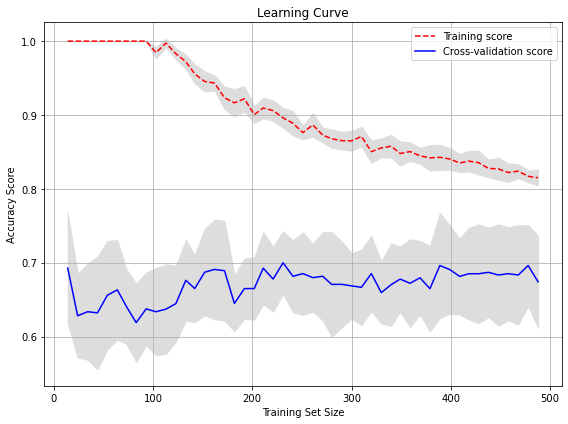

In [373]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import learning_curve 
gb = GradBoost_clf
X = features
y = target 


train_sizes, train_scores, test_scores = learning_curve(gb, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))    
    
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
    
plt.subplots(1, figsize=(8,6))
plt.plot(train_sizes, train_mean, '--', color='red',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

Get feature importance weights from model and display top 10 features 

In [366]:
labels = features.columns.values
weights = GradBoost_clf.feature_importances_
top_features = sorted(list(zip(labels,weights)), reverse=True, key = lambda x: abs(x[1]))[0:5] # Top five features have taken using `sorted()` function.
top_labels = [x[0] for x in top_features] # for loop to plot the top n features
top_weights = [x[1] for x in top_features]
pp.pprint(top_labels) # `pprint()` explicitly notifies the recursion and also adds the ID of the dictionary.
pp.pprint(top_weights)

[   'researchAndDdevelopementToRevenue',
    'cashRatio',
    'pretaxProfitMargin',
    'currentRatio',
    'operatingProfitMargin']
[   0.3621278988483711,
    0.20251240252766425,
    0.14012394835192984,
    0.11532192047513505,
    0.07646872825439094]


Shown 15 predicted classes against actual classes

In [367]:
y_predict = GradBoost_clf.predict(X_test)
for index, (actual, predicted) in enumerate(zip(y_test[:15], y_predict[:15])):
    print(str(index) + '.', 'Actual:', actual, 'Predicted:', round(predicted, 1))

0. Actual: 0 Predicted: 0
1. Actual: 0 Predicted: 0
2. Actual: 0 Predicted: 0
3. Actual: 1 Predicted: 1
4. Actual: 0 Predicted: 0
5. Actual: 0 Predicted: 0
6. Actual: 1 Predicted: 0
7. Actual: 1 Predicted: 0
8. Actual: 0 Predicted: 0
9. Actual: 0 Predicted: 0
10. Actual: 1 Predicted: 0
11. Actual: 1 Predicted: 0
12. Actual: 0 Predicted: 0
13. Actual: 1 Predicted: 0
14. Actual: 1 Predicted: 1


# Voting Classifier

Initialised voting classifier and trained model

In [368]:
from sklearn.ensemble import VotingClassifier
classifier_rf = random_clf
classifier_gb = GradBoost_clf
votingClassifier = VotingClassifier(
    estimators=[
        ('rf', classifier_rf),
        ('gb', classifier_gb) # Here, Voting classifier is performing as a nested-estimator or pipeline.
    ],
    voting='hard', # Here, `hard` uses the predicted class labels for majority rule voting.
    n_jobs=-1 # `n_jobs` means the number of jobs to run in parallel for fit where `-1` implies using all processors. 
      
)


In [369]:
votingClassifier.fit(X_train, y_train) # Fitted the training data using `.fit()` function with `votingClassifier`.
votingClassifier.score(X_train, y_train) # Scored the training data using `.score()` function with `votingClassifier`.

0.781578947368421

Calculated the accuracy score of model using testing data

In [370]:
votingClassifier.score(X_test, y_test)

0.6809815950920245

Shown classification metrics including precision, recall, f1-score and support

In [371]:
print(classification_report(y_test, votingClassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       102
           1       0.62      0.39      0.48        61

    accuracy                           0.68       163
   macro avg       0.66      0.62      0.62       163
weighted avg       0.67      0.68      0.66       163



Shown 15 predicted classes against actual classes

In [372]:
y_predict = votingClassifier.predict(X_test)
for index, (actual, predicted) in enumerate(zip(y_test[:15], y_predict[:15])):
    print(str(index) + '.', 'Actual:', actual, 'Predicted:', round(predicted, 1))

0. Actual: 0 Predicted: 0
1. Actual: 0 Predicted: 0
2. Actual: 0 Predicted: 0
3. Actual: 1 Predicted: 1
4. Actual: 0 Predicted: 0
5. Actual: 0 Predicted: 0
6. Actual: 1 Predicted: 0
7. Actual: 1 Predicted: 0
8. Actual: 0 Predicted: 0
9. Actual: 0 Predicted: 0
10. Actual: 1 Predicted: 0
11. Actual: 1 Predicted: 0
12. Actual: 0 Predicted: 0
13. Actual: 1 Predicted: 0
14. Actual: 1 Predicted: 1
